In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import map matploylib graphinc and charting library
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# 1. Get St. Louis Neighborhood data

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_neighborhoods_of_St._Louis'
df_list = pd.read_html(url)

In [3]:
stl = df_list[1]

In [4]:
stl['Latitude'] = np.nan

stl['Longitude'] = np.nan


# 2. Geocode Neighborhoods

In [5]:
def getlatlong(Neighborhood):
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, St Louis, Missouri'.format(Neighborhood))
        lat_lng_coords = g.latlng
        print(Neighborhood, lat_lng_coords)
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return [latitude, longitude]

stl['Latitude'] = stl['Neighborhood'].apply(lambda x: getlatlong(x)[0])
stl['Longitude'] = stl['Neighborhood'].apply(lambda x: getlatlong(x)[1])

Academy [38.590748000000076, -90.50589499999995]
Baden [38.70553000000007, -90.23000999999994]
Benton Park [38.59962000000007, -90.21887999999996]
Benton Park West [38.597660000000076, -90.23096999999996]
Bevo Mill [38.58386000000007, -90.26637999999997]
Botanical Heights [38.620960000000025, -90.25062999999994]
Boulevard Heights [38.562110000000075, -90.27738999999997]
Carondelet [38.55639000000008, -90.26642999999996]
Carr Square [38.63901000000004, -90.19948999999997]
Central West End [38.641860000000065, -90.25025999999997]
Cheltenham [38.62736000000007, -90.27988999999997]
Clayton-Tamm [38.62704000000008, -90.29131999999998]
Clifton Heights [38.61140000000006, -90.29169999999993]
College Hill [38.674000000000035, -90.20877999999999]
Columbus Square [38.637140000000045, -90.18933999999996]
Compton Heights [38.61298000000005, -90.23625999999996]
DeBaliviere Place [38.649470000000065, -90.27808999999996]
Downtown [38.62549000000007, -90.19029999999998]
Downtown West [38.6297500000000

Visitation Park [38.65662000000003, -90.27560999999997]
Walnut Park East [38.69856000000004, -90.25052999999997]
Walnut Park West [38.70607000000007, -90.25645999999995]
Wells/Goodfellow [38.677410000000066, -90.27033999999998]
West End [38.66110000000003, -90.28764999999999]
Wydown/Skinker [38.63954000000007, -90.30426999999997]


In [6]:
stl[stl['Neighborhood'] == 'Academy']

Neighborhood  Population  White  Black  Hispanic/Latino2  AIAN1  Asian  \
0      Academy        3006   16.9   54.7              20.5   1.52    4.3   

   Mixed Race Corridor   Latitude  Longitude  
0         3.5    North  38.590748 -90.505895

# Note, Geocoding of Academy is wrong
Should be 38.655556,-90.267778

In [7]:
stl.loc[stl['Neighborhood'] =='Academy', 'Latitude'] = 38.655556
stl.loc[stl['Neighborhood'] =='Academy', 'Longitude'] = -90.267778

In [8]:
stl.head()

Neighborhood  Population  White  Black  Hispanic/Latino2  AIAN1  Asian  \
0           Academy        3006   16.9   54.7              20.5   1.52    4.3   
1             Baden        7268    6.3   91.8               0.5   0.10    0.0   
2       Benton Park        3532   68.2   25.1               3.2   0.30    1.2   
3  Benton Park West        4404   28.0   59.6              10.5   0.00    1.9   
4         Bevo Mill       12654   74.2   13.8               7.5   0.40    4.6   

   Mixed Race Corridor   Latitude  Longitude  
0         3.5    North  38.655556 -90.267778  
1         1.3    North  38.705530 -90.230010  
2         3.8    South  38.599620 -90.218880  
3         5.1    South  38.597660 -90.230970  
4         3.9    South  38.583860 -90.266380

# 3. Plot neighborhood points to see results

In [9]:
# create map of St Louis using latitude and longitude values
map_stl = folium.Map(location=[38.6300,-90.26667], zoom_start=11)

# add markers to map
for lat, lng, label in zip(stl['Latitude'], stl['Longitude'], stl['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stl)  
    
map_stl

# Show racial makeup of neighborhoods

In [10]:
stl_black = stl[stl['Black'] >= 70]
stl_white = stl[stl['White'] >= 70]
stl_mixed = stl[(stl['Black'] < 70) & (stl['White'] < 70)]

In [11]:
## Now redraw the map 

# create map of St Louis using latitude and longitude values
map_race = folium.Map(location=[38.6300,-90.26667], zoom_start=11)
# add markers to map
for lat, lng, label in zip(stl_black['Latitude'], stl_black['Longitude'], stl_black['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#000000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_race)  
    
for lat, lng, label in zip(stl_white['Latitude'], stl_white['Longitude'], stl_white['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_race)      

for lat, lng, label in zip(stl_mixed['Latitude'], stl_mixed['Longitude'], stl_mixed['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#A52A2A',
        fill_opacity=0.7,
        parse_html=False).add_to(map_race)      

    
map_race

# 5. Use Foursquare to obtain venue information

In [12]:
CLIENT_ID = 'FBUSMB1E55HUZ4HCO5GMQKSOVBXDXEGACXAE4PPBDIS1DFSN' # your Foursquare ID
CLIENT_SECRET = 'X55DLMCA0J1NCGMUPOZW2QGBRJAYJUPFR2SYU20X5BLR3BB1' # your Foursquare Secret
ACCESS_TOKEN = 'MCTBZD2MR32PYRPMDWQMXWV1UKWKAMOG1WSUEOUL4UMGKZ0H' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FBUSMB1E55HUZ4HCO5GMQKSOVBXDXEGACXAE4PPBDIS1DFSN
CLIENT_SECRET:X55DLMCA0J1NCGMUPOZW2QGBRJAYJUPFR2SYU20X5BLR3BB1


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
stl_venues = getNearbyVenues(names=stl['Neighborhood'],
                                   latitudes=stl['Latitude'],
                                   longitudes=stl['Longitude']
                                  )

Academy
Baden
Benton Park
Benton Park West
Bevo Mill
Botanical Heights
Boulevard Heights
Carondelet
Carr Square
Central West End
Cheltenham
Clayton-Tamm
Clifton Heights
College Hill
Columbus Square
Compton Heights
DeBaliviere Place
Downtown
Downtown West
Dutchtown
Ellendale
Fairground
Forest Park Southeast
Fountain Park
Fox Park
Franz Park
The Gate District
Grand Center
Gravois Park
Greater Ville
Hamilton Heights
The Hill
Hi-Pointe
Holly Hills
Hyde Park
JeffVanderLou
Kings Oak
Kingsway East
Kingsway West
Kosciusko
Lafayette Square
LaSalle Park
Lewis Place
Lindenwood Park
Marine Villa
Mark Twain
Mark Twain/I-70 Industrial
McKinley Heights
Midtown
Mount Pleasant
Near North Riverfront
North Hampton
North Point
North Riverfront
O’Fallon
Old North St. Louis
Patch
Peabody Darst Webbe
Penrose
Princeton Heights
Riverview
Shaw
Skinker-DeBaliviere
Soulard
South Hampton
Southwest Garden
St. Louis Hills
St. Louis Place
Tiffany
Tower Grove East
Tower Grove South
Vandeventer
The Ville
Visitation Par

In [15]:
stl_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Academy              38.655556              -90.267778   
1      Academy              38.655556              -90.267778   
2      Academy              38.655556              -90.267778   
3      Academy              38.655556              -90.267778   
4      Academy              38.655556              -90.267778   

                        Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Third Degree Glass Factory       38.651953       -90.270579         Factory  
1  Jeni's Splendid Ice Creams       38.648150       -90.261064  Ice Cream Shop  
2             Left Bank Books       38.648360       -90.260969       Bookstore  
3               Dressel's Pub       38.649086       -90.260987       Gastropub  
4                 Pi Pizzeria       38.648414       -90.260911     Pizza Place

In [16]:
print(stl_venues.shape)
stl_venue_count = stl_venues[['Neighborhood','Venue Category']].groupby('Neighborhood').count()
stl_unique_venues = stl_venues.drop_duplicates(subset=['Venue Latitude', 'Venue Longitude', 'Venue'], keep='last')
print(stl_unique_venues.shape)

(4964, 7)
(1816, 7)


In [17]:
# create map of St Louis using latitude and longitude values
map_venues = folium.Map(location=[38.6300,-90.26667], zoom_start=11)
# add markers to map
for lat, lng, label in zip(stl_unique_venues['Venue Latitude'], stl_unique_venues['Venue Longitude'], stl_unique_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='crimson',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)  
    
for lat, lng, label in zip(stl['Latitude'], stl['Longitude'], stl['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_venues)  

    
map_venues

In [18]:
print(stl_venues.shape)
stl_venues.groupby('Neighborhood').count()

(4964, 7)


Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                
Academy                                        75                      75   
Baden                                           6                       6   
Benton Park                                    90                      90   
Benton Park West                              100                     100   
Bevo Mill                                      67                      67   
Botanical Heights                              73                      73   
Boulevard Heights                              53                      53   
Carondelet                                     47                      47   
Carr Square                                   100                     100   
Central West End                              100                     100   
Cheltenham                                    100                     100   
Clayton-Tamm                                  100                     100   
Clifton Heights                                70                      70   
College Hill                                   21                      21   
Columbus Square                               100                     100   
Compton Heights                                80                      80   
DeBaliviere Place                              58                      58   
Downtown                                      100                     100   
Downtown West                                 100                     100   
Dutchtown                                      54                      54   
Ellendale                                      91                      91   
Fairground                                     24                      24   
Forest Park Southeast                          92                      92   
Fountain Park                                  61                      61   
Fox Park                                       93                      93   
Franz Park                                     68                      68   
Grand Center                                  100                     100   
Gravois Park                                   94                      94   
Greater Ville                                  16                      16   
Hamilton Heights                               30                      30   
Hi-Pointe                                     100                     100   
Holly Hills                                    57                      57   
Hyde Park                                      28                      28   
JeffVanderLou                                  25                      25   
Kings Oak                                      94                      94   
Kingsway East                                  27                      27   
Kingsway West                                  38                      38   
Kosciusko                                      88                      88   
LaSalle Park                                  100                     100   
Lafayette Square                              100                     100   
Lewis Place                                    52                      52   
Lindenwood Park                                97                      97   
Marine Villa                                   70                      70   
Mark Twain                                      7                       7   
Mark Twain/I-70 Industrial                     15                      15   
McKinley Heights                              100                     100   
Midtown                                       100                     100   
Mount Pleasant                                 28                      28   
Near North Riverfront                          16                      16   
North Hampton                                  95                      95   
North Point             

# 6. Transform data

In [19]:
# one hot encoding
stl_onehot = pd.get_dummies(stl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
stl_onehot['Neighborhood'] = stl_venues['Neighborhood']
# move neighborhood column to the first column
fixed_columns = [stl_onehot.columns[-1]] + list(stl_onehot.columns[:-1])
stl_onehot = stl_onehot[fixed_columns]

stl_onehot.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  Advertising Agency  \
0      Academy    0                  0               0                   0   
1      Academy    0                  0               0                   0   
2      Academy    0                  0               0                   0   
3      Academy    0                  0               0                   0   
4      Academy    0                  0               0                   0   

   American Restaurant  Antique Shop  Aquarium  Arcade  Art Gallery  \
0                    0             0         0       0            0   
1                    0             0         0       0            0   
2                    0             0         0       0            0   
3                    0             0         0       0            0   
4                    0             0         0       0            0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0           0                    0                 0                   0   
1           0                    0                 0                   0   
2           0                    0                 0                   0   
3           0                    0                 0                   0   
4           0                    0                 0                   0   

   Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
0              0                0          0           0       0     0    0   
1              0                0          0           0       0     0    0   
2              0                0          0           0       0     0    0   
3              0                0          0           0       0     0    0   
4              0                0          0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Bed & Breakfast  \
0               0                 0                 0                0   
1               0                 0                 0                0   
2               0                 0                 0                0   
3               0                 0                 0                0   
4               0                 0                 0                0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bistro  Boat or Ferry  \
0         0            0           0              0       0              0   
1         0            0           0              0       0              0   
2         0            0           0              0       0              0   
3         0            0           0              0       0              0   
4         0            0           0              0       0              0   

   Bookstore  Border Crossing  Botanical Garden  Boutique  Bowling Alley  \
0          0                0                 0         0              0   
1          0                0                 0         0              0   
2          1                0                 0         0              0   
3          0                0                 0         0              0   
4          0                0                 0         0              0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bubble Tea Shop  \
0                     0               0        0                0   
1                     0               0        0                0   
2                     0               0        0                0   
3                     0               0        0                0   
4                     0               0        0                0   

   Burger Joint  Bus Station  Bus Stop  Business Service  Butcher  Cafeteria  \
0             0            0         0                 0        0          0   
1             0            0         0                 0        0          0   
2             0            0         0                 0        0          0   
3             0            0         0                 0        0   

In [20]:
stl_onehot.shape

(4964, 262)

In [21]:
stl_grouped = stl_onehot.groupby('Neighborhood').sum().reset_index()
stl_grouped.head()

Neighborhood  ATM  Accessories Store  Adult Boutique  \
0           Academy    0                  2               0   
1             Baden    0                  0               0   
2       Benton Park    0                  0               0   
3  Benton Park West    0                  0               0   
4         Bevo Mill    0                  0               0   

   Advertising Agency  American Restaurant  Antique Shop  Aquarium  Arcade  \
0                   0                    2             0         0       1   
1                   0                    0             0         0       0   
2                   0                    2             0         0       0   
3                   0                    1             0         0       0   
4                   0                    0             0         0       1   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            1           0                    0                 0   
1            0           0                    0                 0   
2            1           0                    0                 1   
3            0           0                    0                 2   
4            0           0                    0                 1   

   Athletics & Sports  Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  \
0                   0              0                0          0           0   
1                   0              0                0          0           0   
2                   0              0                0          2           0   
3                   0              0                0          2           0   
4                   0              0                0          1           0   

   Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0       0     0    1               0                 0                 0   
1       0     0    1               0                 0                 0   
2       3     0    6               0                 0                 0   
3       3     0    4               0                 0                 0   
4       1     0    8               1                 0                 0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Big Box Store  Bistro  \
0                0         0            0           0              0       0   
1                0         0            0           0              0       0   
2                1         0            2           1              0       0   
3                1         0            3           1              0       0   
4                0         0            0           0              1       0   

   Boat or Ferry  Bookstore  Border Crossing  Botanical Garden  Boutique  \
0              0          1                0                 0         1   
1              0          0                0                 0         0   
2              0          0                0                 0         0   
3              0          0                0                 0         2   
4              0          0                0                 0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  \
0              0                     0               1        0   
1              0                     0               0        0   
2              0                     1               2        6   
3              0                     1               3        4   
4              0                     0               0        1   

   Bubble Tea Shop  Burger Joint  Bus Station  Bus Stop  Business Service  \
0                0             0            0         0                 0   
1                0             0            0         0                 0   
2                0             0            0         0                 0   
3                0             0            0         0                 0   
4                0             0            0         0                 0   

  

# 7. Group grocery stores and merge venues with neighborhood data

In [22]:
stl_grouped['All Grocery'] = stl_grouped['Supermarket']+stl_grouped['Grocery Store']+ stl_grouped['Farmers Market']

In [44]:
stl_grocery = stl.merge(stl_grouped[['Neighborhood','All Grocery', 'Supermarket']], how='left', on='Neighborhood' )

In [45]:
gt = stl_grocery
gt['Group'] = ''
gt.loc[gt['Black'] >=84.9, 'Group'] = 'Black'
gt.loc[gt['White'] >=58.0, 'Group'] = 'White'
gt.loc[(gt['Black'] < 80.0) & (gt['White'] < 58.0), 'Group'] = 'Mixed'


In [46]:
import scipy.stats as stats

stats.f_oneway(#gt[gt['Group'] == 'Black']['All Grocery'],
               gt[gt['Group'] == 'Mixed']['All Grocery'],
               gt[gt['Group'] == 'White']['All Grocery']
              )

F_onewayResult(statistic=2.606683804627248, pvalue=0.11296946033199662)

In [47]:
stats.f_oneway(#gt[gt['Group'] == 'Black']['Supermarket'],
               gt[gt['Group'] == 'Mixed']['Supermarket'],
               gt[gt['Group'] == 'White']['Supermarket']
              )

F_onewayResult(statistic=1.5737704918032789, pvalue=0.21573475327353708)

In [27]:
stl_ven_counts = stl.merge(stl_venue_count, how='left', on='Neighborhood' )

In [28]:
BW_ven_counts = stl_ven_counts[['White','Black','Venue Category']].sort_values('White',axis=0, ascending=True, inplace=False)
BW_ven_counts

White  Black  Venue Category
8     0.5   98.0             100
29    0.7   97.4              16
76    0.7   97.5              23
58    0.8   97.2              29
45    1.0   97.8               7
30    1.0   97.4              30
54    1.1   96.8              26
75    1.1   97.9              18
72    1.2   97.3              11
71    1.2   95.7              27
52    1.2   97.5              30
23    1.2   84.4              61
35    1.3   97.2              25
37    1.4   96.1              27
74    1.5   96.7              10
21    1.7   97.1              24
46    2.4   95.8              15
38    3.4   94.5              38
13    3.7   92.7              21
14    4.1   92.9             100
42    5.4   94.2              52
73    5.8   90.4              44
1     6.3   91.8               6
67    7.1   91.7              32
77    8.1   84.9              56
57   10.3   87.5             100
68   10.8   84.1              66
34   13.6   84.8              28
53   14.2   71.9               5
26   14.4   82.0              42
0    16.9   54.7              75
5    20.3   74.4              73
28   22.4   68.4              94
3    28.0   59.6             100
41   28.3   67.6             100
60   28.9   68.9              12
22   30.1   64.3              92
24   32.3   61.2              93
27   35.0   56.3             100
19   35.6   50.8              54
44   37.7   55.4              70
55   40.9   50.1              19
39   42.9   42.9              88
49   43.2   47.1              28
50   43.2   55.0              16
69   45.9   43.9              79
47   48.3   46.0             100
62   49.8   37.9             100
61   51.7   41.9              80
17   53.5   37.1             100
70   54.9   29.7             100
36   55.0   38.9              94
18   56.3   36.9             100
7    57.3   33.8              47
9    58.0   28.0             100
16   59.0   29.4              58
48   61.9   25.8             100
10   67.3   15.0             100
2    68.2   25.1              90
15   71.0   21.3              80
56   71.3   21.2              51
4    74.2   13.8              67
51   75.8   15.2              95
65   76.9   16.5             100
40   80.5   13.5             100
20   80.6   11.9              91
33   81.2   11.5              57
63   82.6   13.3              90
32   85.0    6.9             100
78   85.7    3.4              93
25   86.2    7.9              68
64   86.4    8.3             100
11   89.0    6.0             100
6    89.5    3.6              53
12   90.1    3.9              70
43   91.2    4.3              97
59   91.8    4.5              79
31   93.7    3.4              83
66   94.4    2.4              59

<IPython.core.display.Javascript object>


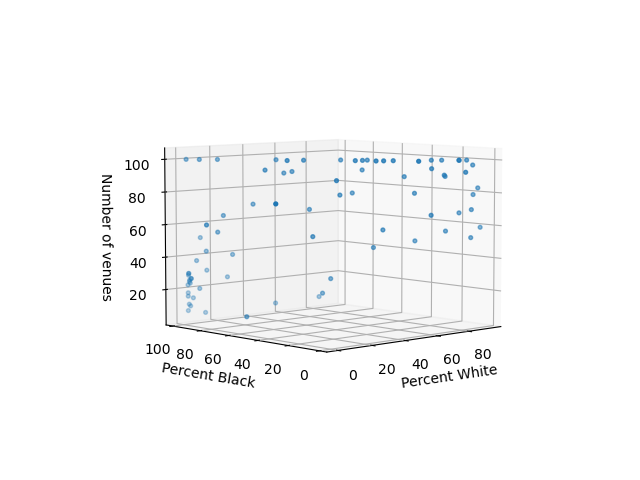

In [29]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = BW_ven_counts['White']
ys = BW_ven_counts['Black']
zs = BW_ven_counts['Venue Category']
ax.scatter(xs, ys, zs, marker=".", s=30)

ax.set_xlabel('Percent White')
ax.set_ylabel('Percent Black')
ax.set_zlabel('Number of venues')

plt.show()


In [30]:
ven_black = BW_ven_counts[BW_ven_counts['Black'] >= 70]
ven_white = BW_ven_counts[BW_ven_counts['White'] >= 70]
ven_mixed = BW_ven_counts[(BW_ven_counts['Black'] < 70) & (BW_ven_counts['White'] < 70)]

<IPython.core.display.Javascript object>


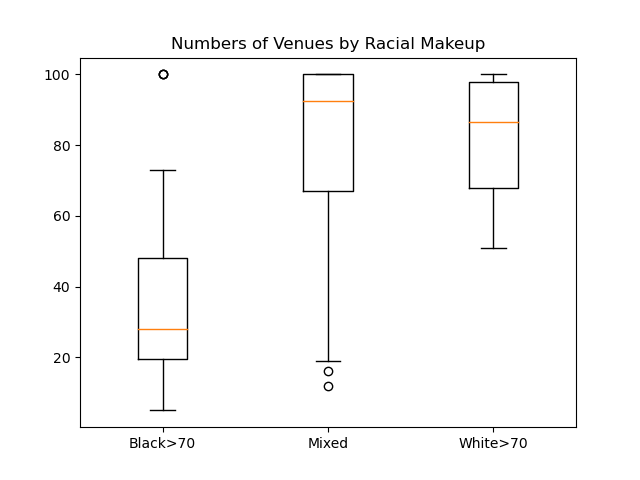

In [31]:
data = [ven_black['Venue Category'], ven_mixed['Venue Category'], ven_white['Venue Category']]
fig7, ax7 = plt.subplots()
ax7.set_title('Numbers of Venues by Racial Makeup')

ax7.boxplot(data)
plt.xticks([1, 2, 3], ['Black>70','Mixed','White>70'])
plt.show()

# 8. Cluster neighborhoods by most frequent businesses

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = stl_grouped['Neighborhood']

for ind in np.arange(stl_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(stl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0           Academy        Discount Store  Fast Food Restaurant   
1             Baden  Fast Food Restaurant           Post Office   
2       Benton Park               Brewery                   Bar   
3  Benton Park West           Coffee Shop           Pizza Place   
4         Bevo Mill                   Bar    Mexican Restaurant   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Gym   Fried Chicken Joint           All Grocery   
1                   Bar     Convenience Store                  Food   
2           Pizza Place    Mexican Restaurant         Grocery Store   
3                   Bar               Brewery                  Café   
4        Discount Store     Convenience Store  Fast Food Restaurant   

  6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0                  Park           Grocery Store        Ice Cream Shop   
1        Waste Facility              Food Court           Flea Market   
2           Coffee Shop              Restaurant                  Café   
3                Bakery             Beer Garden        Breakfast Spot   
4        Cosmetics Shop  Thrift / Vintage Store      Video Game Store   

  9th Most Common Venue 10th Most Common Venue  
0             Nightclub              Gastropub  
1           Flower Shop      Fondue Restaurant  
2   Fried Chicken Joint                 Bakery  
3       Thai Restaurant              Rock Club  
4          Intersection            Pizza Place

In [34]:
# set number of clusters
kclusters = 5

stl_grouped_clustering = stl_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(stl_grouped_clustering)



In [35]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stl_clustered = stl

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
stl_clustered = stl_clustered.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



stl_clustered['Cluster Labels'].value_counts()

0    40
4    17
2    11
3     7
1     4
Name: Cluster Labels, dtype: int64

In [36]:
# create map
map_clusters = folium.Map(location=[38.6300,-90.26667], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stl_clustered['Latitude'], stl_clustered['Longitude'], stl_clustered['Neighborhood'], stl_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
stl_merged = stl_clustered.merge(stl_grocery[['Neighborhood','Supermarket', 'All Grocery']], how='left', on='Neighborhood' )

In [38]:
stl_merged.groupby('Cluster Labels').mean().reset_index()

Cluster Labels   Population      White      Black  Hispanic/Latino2  \
0               0  4294.775000  25.017500  69.785000          3.160000   
1               1  1530.250000  81.750000   7.825000          3.350000   
2               2  2605.636364  42.654545  51.045455          1.854545   
3               3  4980.571429  81.300000  12.928571          3.185714   
4               4  4590.823529  41.829412  49.729412          4.200000   

      AIAN1     Asian  Mixed Race   Latitude  Longitude  Supermarket  \
0  0.273000  1.157500    1.860000  38.648890 -90.248448     0.125000   
1  0.150000  6.200000    3.075000  38.630948 -90.294535     0.500000   
2  0.200000  2.200000    3.445455  38.620325 -90.205427     0.545455   
3  0.242857  2.300000    2.400000  38.607889 -90.285394     0.142857   
4  0.258824  3.635294    2.911765  38.614854 -90.247492     0.058824   

   All Grocery  
0     1.200000  
1     1.250000  
2     1.636364  
3     2.285714  
4     1.588235

In [39]:
stl_grocery[stl_grocery['Black'] > 90] 

Neighborhood  Population  White  Black  Hispanic/Latino2  \
1                        Baden        7268    6.3   91.8               0.5   
8                  Carr Square        2774    0.5   98.0               0.5   
13                College Hill        1870    3.7   92.7               1.2   
14             Columbus Square        1869    4.1   92.9               0.9   
21                  Fairground        1793    1.7   97.1               0.5   
29               Greater Ville        6189    0.7   97.4               0.7   
30            Hamilton Heights        3105    1.0   97.4               0.5   
35               JeffVanderLou        5557    1.3   97.2               0.6   
37               Kingsway East        3542    1.4   96.1               1.1   
38               Kingsway West        3441    3.4   94.5               0.8   
42                 Lewis Place        1673    5.4   94.2               0.9   
45                  Mark Twain        4188    1.0   97.8               0.5   
46  Mark Twain/I-70 Industrial        1295    2.4   95.8               1.9   
52                 North Point        3966    1.2   97.5               0.4   
54                    O’Fallon        5791    1.1   96.8               0.9   
58                     Penrose        6387    0.8   97.2               0.5   
67             St. Louis Place        2939    7.1   91.7               0.6   
71                 Vandeventer        1682    1.2   95.7               1.2   
72                   The Ville        1868    1.2   97.3               0.8   
73             Visitation Park         960    5.8   90.4               0.3   
74            Walnut Park East        4130    1.5   96.7               0.8   
75            Walnut Park West        3349    1.1   97.9               0.8   
76            Wells/Goodfellow        5859    0.7   97.5               0.6   

    AIAN1  Asian  Mixed Race Corridor  Latitude  Longitude  All Grocery  \
1     0.1    0.0         1.3    North  38.70553  -90.23001            0   
8     0.3    0.0         0.9    North  38.63901  -90.19949            1   
13    0.5    0.6         2.3    North  38.67400  -90.20878            1   
14    0.2    0.6         1.9    North  38.63714  -90.18934            1   
21    0.1    0.0         1.0    North  38.66745  -90.21776            1   
29    0.2    0.0         1.4    North  38.66621  -90.23469            1   
30    0.3    0.1         1.2    North  38.66876  -90.27993            1   
35    0.1    0.0         1.2    North  38.65215  -90.21941            1   
37    0.1    0.1         2.2    North  38.66833  -90.25407            2   
38    0.5    0.0         1.4    North  38.67318  -90.25922            1   
42    0.4    0.2         1.2    North  38.65440  -90.25047            1   
45    0.2    0.0         0.9    North  38.68886  -90.24194            0   
46    0.0    0.0         0.5    North  38.68772  -90.26710            1   
52    0.0    0.0         1.0    North  38.71572  -90.24634            1   
54    0.3    0.0         1.6    North  38.67556  -90.22442            1   
58    0.2    0.0         1.4    North  38.67864  -90.23935            1   
67    0.2    0.3         1.9    North  38.65148  -90.20536            1   
71    0.2    0.0         2.3    North  38.65005  -90.24132            0   
72    0.2    0.0         1.3    North  38.65947  -90.24069            1   
73    0.1    0.4         2.6    North  38.65662  -90.27561            1   
74    0.1    0.0         1.5    North  38.69856  -90.25053            0   
75    0.0    0.0         0.8    North  38.70607  -90.25646            0   
76    0.2    0.2         1.4    North  38.67741  -90.27034            2   

    Supermarket  Group  
1             0  Black  
8             0  Black  
13            0  Black  
14            0  Black  
21            0  Black  
29            0  Black  
30            0  Black  
35            0  Black  
37            0  Black  
38            0  Black  
42            0  Black  
45            0  Black  
46            0  Bl